In [ ]:
# RSI means Relative Strength Index. 

The relative strength index (RSI) is a momentum indicator used in technical analysis. 
RSI measures the speed and magnitude of a security's recent price changes to evaluate 
overvalued or undervalued conditions in the price of that security.

The RSI is displayed as an oscillator (a line graph) on a scale of zero to 100. The 
indicator was developed by J. Welles Wilder Jr. and introduced in his seminal 1978 book, 
New Concepts in Technical Trading Systems.

The RSI can do more than point to overbought and oversold securities. It can also indicate
securities that may be primed for a trend reversal or corrective pullback in price. It can 
signal when to buy and sell. Traditionally, an RSI reading of 70 or above indicates an 
overbought situation. A reading of 30 or below indicates an oversold condition.

In [21]:
# import the necessary modules
# Importing the necessary modules
import pandas as pd
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from mplfinance.original_flavor import candlestick_ohlc
yf.pdr_override() # <== that's all it takes :-)

In [22]:
# Defining the Time Frame
start = dt.datetime(2023,1,1)
end = dt.datetime.now()

In [23]:
# Loading the stock data
ticker = 'TSLA'
data = yf.download(ticker, start, end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
...,...,...,...,...,...,...
2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500
2023-12-19,253.479996,258.339996,253.009995,257.220001,257.220001,106737400
2023-12-20,256.410004,259.839996,247.000000,247.139999,247.139999,125097000


In [24]:
# Calculating the adjusted close price with the day before
delta = data['Adj Close'].diff(1)
delta.dropna(inplace=True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0 # Positive remains but negative gets to a minimum value of zero
negative[negative > 0] = 0 # negative remains but positive gets to a minimum value of zero

days = 30 # specifying the timeframe we are investigating
average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0 +relative_strength))

combined = pd.DataFrame()
combined['Adj Close'] = data['Adj Close']
combined['RSI'] = RSI

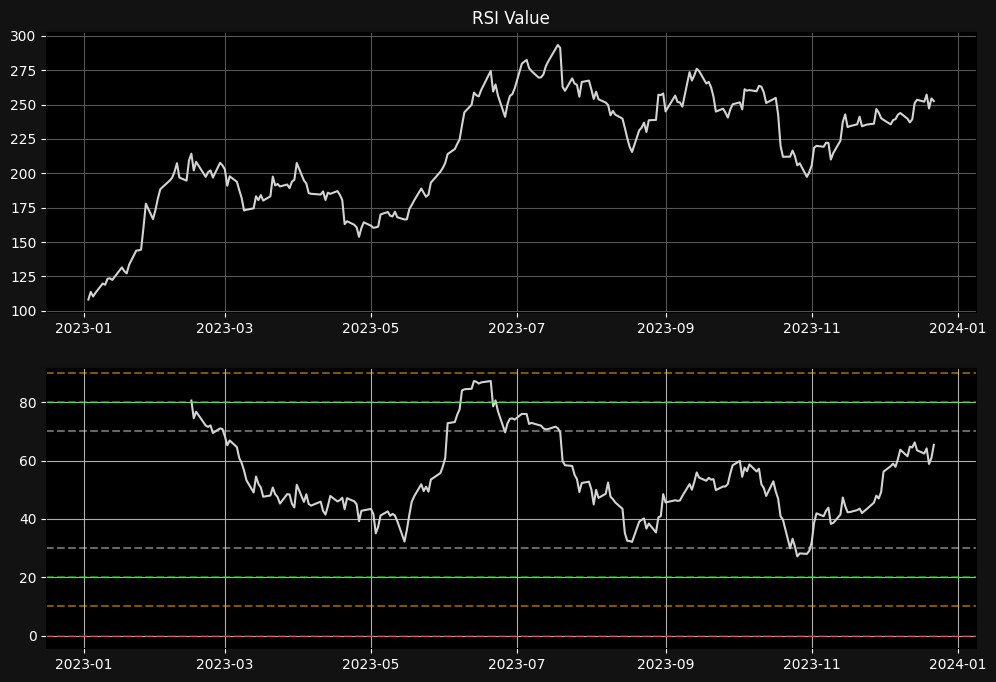

In [25]:
# Plotting the results
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color='white')

ax1.grid(True, color="#555555")
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.axhline(0, linestyle='--', alpha=0.5, color='#ff0000') # oversold condition
ax2.axhline(10, linestyle='--', alpha=0.5, color='#ffaa00') # oversold condition
ax2.axhline(20, linestyle='--', alpha=0.5, color='#00ff00') # oversold condition
ax2.axhline(30, linestyle='--', alpha=0.5, color='#cccccc') # oversold condition
ax2.axhline(70, linestyle='--', alpha=0.5, color='#cccccc') # overbought condition
ax2.axhline(80, linestyle='--', alpha=0.5, color='#00ff00') # overbought condition
ax2.axhline(90, linestyle='--', alpha=0.5, color='#ffaa00') # overbought condition

ax1.set_title('RSI Value', color='white')
ax2.grid("False")
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

plt.show()

## Overbought or Oversold
Generally, when the RSI indicator crosses 30 on the RSI chart, 
it is a bullish sign and when it crosses 70, it is a bearish sign. 
Put another way, one can interpret that RSI values of 70 or above 
indicate that a security is becoming overbought or overvalued. It 
may be primed for a trend reversal or corrective price pullback. 
An RSI reading of 30 or below indicates an oversold or undervalued condition.

Overbought refers to a security that trades at a price level above its true 
(or intrinsic) value. That means that it's priced above where it should be, 
according to practitioners of either technical analysis or fundamental analysis. 
Traders who see indications that a security is overbought may expect a price correction 
or trend reversal. Therefore, they may sell the security.

The same idea applies to a security that technical indicators such as the relative 
strength index highlight as oversold. It can be seen as trading at a lower price than 
it should. Traders watching for just such an indication might expect a price correction 
or trend reversal and buy the security.